# KLASYFIKACJA BINARNA

In [ ]:
from keras.datasets import imdb

### Definicja danych treningowych i testowych

In [ ]:
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Przykładowa zakodowana recenzja (indeksy 0,1,2 zarezerwowane 0 to padding, 1 to początek sekwencji, 2 nieznane słowo )

In [ ]:
max([max(sequence) for sequence in train_data])

9999

Ilość najpopularniejszych słów które rozważamy

In [34]:
word_index=imdb.get_word_index()


In [ ]:
reverse_word_index=dict(
    [(value,key) for (key, value) in word_index.items()])
decoded_review= ' '.join(
[reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(word_index['and'])
print(reverse_word_index[11])
print(decoded_review)

2
this
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't 

Odkodowana recenzja o indeksie 0, reverse_word_index.get(i-3, '?') tutaj get zwraca '?' jeśli wartość nie istnieje

In [ ]:
import numpy as np

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
print(vectorize_sequences([3,5], dimension=100))


[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [ ]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

Zamiana danych treningowych i testowych na wektory

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

Zamiana etykiet próbek na wektory

### Budowa sieci neuronowej

### Ta sieć neuronowa będzie składać się z 3 warstw:
- dwóch warstw pośrednich Dense, zawierających po 16 ukrytych jednostek ( wymiarów przestrzeni ) każda
- jednej warstwy Dense generującej przewidywania w postaci skalarnej ( z przedziału od 0 do 1 )

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Metryka, optymalizator i funkcja są definiowane za pomocą łańcuchów

In [18]:
from tensorflow.keras import optimizers

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Konfiguracja optymalizatora

In [20]:
from keras import losses
from keras import metrics

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

Korzystanie z własnych funkcji straty i metryki

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [23]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Tworzenie zbioru walidacyjnego

In [ ]:
model.compile(optimizer='rmsprop',
              loss= 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Trenowanie modelu przez 20 epok ( wykona 20 iteracji wszystkich próbek znajdujących się w tensorach x_train i y_train, z podziałem na wsady po 512 próbek. Jednocześnie monitoruję funckje straty i dokładność modelu.


In [28]:
history_dict= history.history

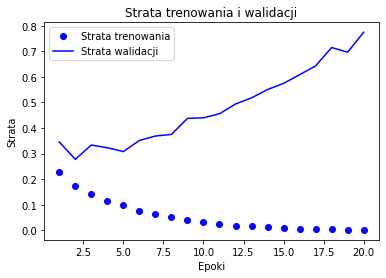

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Strata trenowania') # linia przerywana w postaci niebieskich kropek
plt.plot(epochs, val_loss, 'b', label='Strata walidacji') # linia ciągła niebieska
plt.title('Strata trenowania i walidacji')
plt.xlabel("Epoki")
plt.ylabel('Strata')
plt.legend()

plt.show()

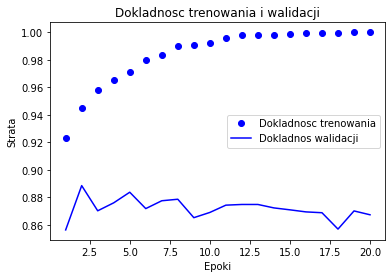

In [29]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania') # linia przerywana w postaci niebieskich kropek
plt.plot(epochs, val_acc, 'b', label='Dokladnos walidacji') # linia ciągła niebieska
plt.title('Dokladnosc trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()



In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

Ponowne uczenie modelu od początku ( zredukowano liczbe epok, aby uniknąć zjawiska przetrenowania )

In [32]:
results

[0.3072217106819153, 0.8787199854850769]

Skuteczność na poziomie 88%

In [35]:
model.predict(x_test)

array([[0.12482849],
       [0.99988997],
       [0.79692686],
       ...,
       [0.09965089],
       [0.05508211],
       [0.5504749 ]], dtype=float32)